# Burhanudin Zuhri

Import Library

In [30]:
import os, zipfile, shutil, PIL
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

Unzip Dataset

Link Dataset : https://www.kaggle.com/datasets/aladdinss/license-plate-digits-classification-dataset

In [4]:
!unzip '../content/drive/MyDrive/Dicoding/Dataset/LicensePlateDigits.zip' -d '../content/drive/MyDrive/Dicoding/Dataset/'

Output streaming akan dipotong hingga 5000 baris terakhir.

  inflating: ../content/drive/MyDrive/Dicoding/Dataset/CNN letter Dataset/U/aug14481_0.jpg  

  inflating: ../content/drive/MyDrive/Dicoding/Dataset/CNN letter Dataset/U/aug14482_1.jpg  

  inflating: ../content/drive/MyDrive/Dicoding/Dataset/CNN letter Dataset/U/aug14483_2.jpg  

  inflating: ../content/drive/MyDrive/Dicoding/Dataset/CNN letter Dataset/U/aug14484_3.jpg  

  inflating: ../content/drive/MyDrive/Dicoding/Dataset/CNN letter Dataset/U/aug14485_4.jpg  

  inflating: ../content/drive/MyDrive/Dicoding/Dataset/CNN letter Dataset/U/aug14486_5.jpg  

  inflating: ../content/drive/MyDrive/Dicoding/Dataset/CNN letter Dataset/U/aug14487_6.jpg  

  inflating: ../content/drive/MyDrive/Dicoding/Dataset/CNN letter Dataset/U/aug14488_7.jpg  

  inflating: ../content/drive/MyDrive/Dicoding/Dataset/CNN letter Dataset/U/aug14489_8.jpg  

  inflating: ../content/drive/MyDrive/Dicoding/Dataset/CNN letter Dataset/U/aug14490_9.jpg  



Spliting Folder

In [20]:
!pip install split-folders

import splitfolders
splitfolders.ratio('CNN letter Dataset', output="output", seed=1337, ratio=(.8, 0.2)) 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:01,  1.92s/ files]
Copying files: 4 files [00:02,  2.55 files/s]
Copying files: 15 files [00:02, 12.17 files/s]
Copying files: 25 files [00:02, 21.86 files/s]
Copying files: 33 files [00:02, 29.46 files/s]
Copying files: 42 files [00:02, 39.06 files/s]
Copying files: 53 files [00:02, 52.37 files/s]
Copying files: 67 files [00:02, 69.59 files/s]
Copying files: 79 files [00:02, 80.96 files/s]
Copying files: 91 files [00:02, 88.16 files/s]
Copying files: 102 files [00:02, 92.08 files/s]
Copying files: 116 files [00:03, 104.70 files/s]
Copying files: 128 files [00:03, 103.78 files/s]
Copying files: 143 files [00:03, 113.98 files/s]
Copying files: 156 files [00:03, 113.69 files/s]
Copying files: 168 files [00:03, 112.95 files/s]
Copying files: 183 files [00:03, 120.54 files/s]
Copying files: 196 files [00:03, 118.23 files/s]
Copying files: 208 files [00:03, 112.20 files/s]
Copying files: 220 files [00:04, 104.90 files/s]


Copying files: 2339 files [01:29, 80.83 files/s]
Copying files: 2350 files [01:29, 75.75 files/s]
Copying files: 2360 files [01:30, 59.05 files/s]
Copying files: 2377 files [01:30, 77.85 files/s]
Copying files: 2388 files [01:30, 59.30 files/s]
Copying files: 2397 files [01:30, 59.10 files/s]
Copying files: 2405 files [01:30, 57.49 files/s]
Copying files: 2428 files [01:30, 89.78 files/s]
Copying files: 2448 files [01:30, 112.21 files/s]
Copying files: 2462 files [01:31, 113.63 files/s]
Copying files: 2476 files [01:31, 92.66 files/s] 
Copying files: 2488 files [01:32, 36.99 files/s]
Copying files: 2497 files [01:33, 24.10 files/s]
Copying files: 2504 files [01:33, 24.53 files/s]
Copying files: 2510 files [01:33, 23.29 files/s]
Copying files: 2515 files [01:34, 17.23 files/s]
Copying files: 2519 files [01:34, 13.67 files/s]
Copying files: 2522 files [01:35, 12.91 files/s]
Copying files: 2524 files [01:35, 11.98 files/s]
Copying files: 2529 files [01:35, 15.73 files/s]
Copying files: 25

Copying files: 4896 files [02:51, 50.43 files/s]
Copying files: 4904 files [02:52, 45.83 files/s]
Copying files: 4911 files [02:52, 40.28 files/s]
Copying files: 4917 files [02:52, 37.88 files/s]
Copying files: 4924 files [02:52, 43.06 files/s]
Copying files: 4930 files [02:52, 37.65 files/s]
Copying files: 4935 files [02:53, 33.53 files/s]
Copying files: 4939 files [02:53, 31.52 files/s]
Copying files: 4943 files [02:53, 27.76 files/s]
Copying files: 4947 files [02:53, 24.24 files/s]
Copying files: 4950 files [02:53, 21.67 files/s]
Copying files: 4965 files [02:54, 44.03 files/s]
Copying files: 4971 files [02:54, 33.03 files/s]
Copying files: 4976 files [02:54, 28.98 files/s]
Copying files: 4992 files [02:54, 50.06 files/s]
Copying files: 5000 files [02:55, 24.16 files/s]
Copying files: 5006 files [02:55, 20.62 files/s]
Copying files: 5011 files [02:56, 21.22 files/s]
Copying files: 5015 files [02:56, 21.56 files/s]
Copying files: 5019 files [02:56, 21.70 files/s]
Copying files: 5035 

Copying files: 7024 files [04:15,  6.78 files/s]
Copying files: 7025 files [04:15,  6.57 files/s]
Copying files: 7026 files [04:16,  5.51 files/s]
Copying files: 7027 files [04:16,  5.35 files/s]
Copying files: 7043 files [04:16, 29.46 files/s]
Copying files: 7062 files [04:16, 58.58 files/s]
Copying files: 7072 files [04:16, 57.30 files/s]
Copying files: 7090 files [04:16, 81.63 files/s]
Copying files: 7107 files [04:16, 100.61 files/s]
Copying files: 7120 files [04:17, 99.32 files/s] 
Copying files: 7132 files [04:17, 82.03 files/s]
Copying files: 7142 files [04:17, 43.25 files/s]
Copying files: 7150 files [04:18, 32.02 files/s]
Copying files: 7156 files [04:18, 25.02 files/s]
Copying files: 7161 files [04:18, 23.98 files/s]
Copying files: 7167 files [04:19, 27.77 files/s]
Copying files: 7172 files [04:19, 26.46 files/s]
Copying files: 7176 files [04:19, 21.66 files/s]
Copying files: 7179 files [04:19, 21.13 files/s]
Copying files: 7182 files [04:19, 20.98 files/s]
Copying files: 718

Copying files: 8058 files [05:23,  7.60 files/s]
Copying files: 8059 files [05:23,  7.28 files/s]
Copying files: 8060 files [05:24,  7.44 files/s]
Copying files: 8061 files [05:24,  7.01 files/s]
Copying files: 8062 files [05:24,  6.87 files/s]
Copying files: 8063 files [05:24,  6.82 files/s]
Copying files: 8064 files [05:24,  6.79 files/s]
Copying files: 8065 files [05:24,  6.23 files/s]
Copying files: 8066 files [05:24,  6.70 files/s]
Copying files: 8067 files [05:25,  6.10 files/s]
Copying files: 8068 files [05:25,  6.39 files/s]
Copying files: 8069 files [05:25,  6.34 files/s]
Copying files: 8070 files [05:25,  6.85 files/s]
Copying files: 8071 files [05:25,  7.22 files/s]
Copying files: 8072 files [05:25,  6.72 files/s]
Copying files: 8075 files [05:26, 10.19 files/s]
Copying files: 8076 files [05:26,  8.46 files/s]
Copying files: 8077 files [05:26,  8.35 files/s]
Copying files: 8078 files [05:26,  7.91 files/s]
Copying files: 8079 files [05:26,  7.91 files/s]
Copying files: 8080 

Copying files: 8980 files [06:29, 28.68 files/s]
Copying files: 8983 files [06:29, 20.25 files/s]
Copying files: 8986 files [06:29, 19.55 files/s]
Copying files: 8989 files [06:29, 18.43 files/s]
Copying files: 8992 files [06:29, 17.17 files/s]
Copying files: 8994 files [06:30, 17.55 files/s]
Copying files: 8996 files [06:30, 16.20 files/s]
Copying files: 8999 files [06:30, 16.34 files/s]
Copying files: 9002 files [06:30, 17.82 files/s]
Copying files: 9004 files [06:30, 18.17 files/s]
Copying files: 9006 files [06:30, 18.31 files/s]
Copying files: 9008 files [06:30, 17.14 files/s]
Copying files: 9010 files [06:31, 12.74 files/s]
Copying files: 9012 files [06:31, 12.85 files/s]
Copying files: 9014 files [06:31, 13.21 files/s]
Copying files: 9016 files [06:31, 12.78 files/s]
Copying files: 9019 files [06:31, 15.09 files/s]
Copying files: 9021 files [06:31, 12.92 files/s]
Copying files: 9024 files [06:32, 15.86 files/s]
Copying files: 9026 files [06:32, 16.38 files/s]
Copying files: 9029 

Copying files: 10105 files [07:31, 42.74 files/s]
Copying files: 10113 files [07:32, 31.06 files/s]
Copying files: 10119 files [07:32, 28.73 files/s]
Copying files: 10124 files [07:32, 27.56 files/s]
Copying files: 10129 files [07:33, 23.69 files/s]
Copying files: 10133 files [07:33, 19.92 files/s]
Copying files: 10136 files [07:33, 19.34 files/s]
Copying files: 10148 files [07:33, 32.80 files/s]
Copying files: 10161 files [07:33, 47.87 files/s]
Copying files: 10175 files [07:33, 64.00 files/s]
Copying files: 10188 files [07:34, 77.65 files/s]
Copying files: 10199 files [07:34, 62.47 files/s]
Copying files: 10211 files [07:34, 73.16 files/s]
Copying files: 10224 files [07:34, 85.40 files/s]
Copying files: 10238 files [07:34, 97.56 files/s]
Copying files: 10250 files [07:34, 69.46 files/s]
Copying files: 10260 files [07:35, 69.69 files/s]
Copying files: 10269 files [07:35, 48.12 files/s]
Copying files: 10276 files [07:35, 41.20 files/s]
Copying files: 10282 files [07:35, 35.32 files/s]


Copying files: 12449 files [08:38,  8.34 files/s]
Copying files: 12450 files [08:39,  6.42 files/s]
Copying files: 12451 files [08:39,  4.55 files/s]
Copying files: 12458 files [08:40,  6.96 files/s]
Copying files: 12459 files [08:40,  6.00 files/s]
Copying files: 12460 files [08:40,  5.99 files/s]
Copying files: 12461 files [08:41,  5.59 files/s]
Copying files: 12462 files [08:41,  5.22 files/s]
Copying files: 12463 files [08:41,  5.21 files/s]
Copying files: 12464 files [08:41,  5.02 files/s]
Copying files: 12465 files [08:41,  5.11 files/s]
Copying files: 12466 files [08:42,  4.25 files/s]
Copying files: 12467 files [08:42,  4.00 files/s]
Copying files: 12468 files [08:42,  4.29 files/s]
Copying files: 12469 files [08:42,  4.60 files/s]
Copying files: 12470 files [08:43,  4.14 files/s]
Copying files: 12471 files [08:43,  4.86 files/s]
Copying files: 12479 files [08:43, 17.42 files/s]
Copying files: 12482 files [08:43, 15.93 files/s]
Copying files: 12485 files [08:43, 16.64 files/s]


Copying files: 13868 files [09:46, 41.89 files/s]
Copying files: 13874 files [09:46, 39.58 files/s]
Copying files: 13879 files [09:46, 26.98 files/s]
Copying files: 13883 files [09:46, 25.69 files/s]
Copying files: 13887 files [09:47, 21.72 files/s]
Copying files: 13890 files [09:47, 17.36 files/s]
Copying files: 13893 files [09:47, 15.65 files/s]
Copying files: 13895 files [09:48, 14.41 files/s]
Copying files: 13897 files [09:48, 13.31 files/s]
Copying files: 13899 files [09:48, 12.82 files/s]
Copying files: 13901 files [09:48, 12.06 files/s]
Copying files: 13903 files [09:48, 12.55 files/s]
Copying files: 13905 files [09:48, 13.27 files/s]
Copying files: 13907 files [09:48, 14.12 files/s]
Copying files: 13909 files [09:49, 14.37 files/s]
Copying files: 13911 files [09:49, 14.68 files/s]
Copying files: 13913 files [09:49, 14.47 files/s]
Copying files: 13923 files [09:49, 34.10 files/s]
Copying files: 13927 files [09:49, 24.69 files/s]
Copying files: 13931 files [09:49, 23.97 files/s]


Copying files: 15311 files [10:50, 16.23 files/s]
Copying files: 15313 files [10:50, 15.75 files/s]
Copying files: 15325 files [10:51, 35.25 files/s]
Copying files: 15330 files [10:51, 24.54 files/s]
Copying files: 15334 files [10:51, 23.97 files/s]
Copying files: 15338 files [10:51, 18.07 files/s]
Copying files: 15341 files [10:52, 13.37 files/s]
Copying files: 15343 files [10:52, 12.78 files/s]
Copying files: 15345 files [10:52, 12.79 files/s]
Copying files: 15347 files [10:52, 13.39 files/s]
Copying files: 15349 files [10:53, 14.04 files/s]
Copying files: 15351 files [10:53, 13.48 files/s]
Copying files: 15353 files [10:53, 13.70 files/s]
Copying files: 15355 files [10:53, 14.63 files/s]
Copying files: 15357 files [10:53, 12.98 files/s]
Copying files: 15363 files [10:53, 22.55 files/s]
Copying files: 15366 files [10:54, 16.49 files/s]
Copying files: 15369 files [10:54, 17.81 files/s]
Copying files: 15381 files [10:54, 21.62 files/s]
Copying files: 15384 files [10:54, 22.08 files/s]


Copying files: 16844 files [12:22, 58.12 files/s]
Copying files: 16851 files [12:22, 49.06 files/s]
Copying files: 16858 files [12:22, 53.32 files/s]
Copying files: 16871 files [12:22, 69.30 files/s]
Copying files: 16883 files [12:22, 81.53 files/s]
Copying files: 16899 files [12:22, 100.81 files/s]
Copying files: 16915 files [12:23, 116.05 files/s]
Copying files: 16931 files [12:23, 127.12 files/s]
Copying files: 16945 files [12:23, 77.93 files/s] 
Copying files: 16956 files [12:23, 61.47 files/s]
Copying files: 16965 files [12:23, 58.63 files/s]
Copying files: 16973 files [12:24, 58.97 files/s]
Copying files: 16981 files [12:24, 57.59 files/s]
Copying files: 16990 files [12:24, 63.19 files/s]
Copying files: 16998 files [12:24, 66.30 files/s]
Copying files: 17006 files [12:24, 46.64 files/s]
Copying files: 17015 files [12:24, 54.47 files/s]
Copying files: 17026 files [12:24, 65.49 files/s]
Copying files: 17034 files [12:25, 59.58 files/s]
Copying files: 17041 files [12:25, 41.75 files

Copying files: 18538 files [13:34, 19.76 files/s]
Copying files: 18541 files [13:34, 17.13 files/s]
Copying files: 18544 files [13:34, 17.83 files/s]
Copying files: 18553 files [13:35, 29.60 files/s]
Copying files: 18562 files [13:35, 40.98 files/s]
Copying files: 18570 files [13:35, 49.21 files/s]
Copying files: 18580 files [13:35, 58.34 files/s]
Copying files: 18587 files [13:35, 37.71 files/s]
Copying files: 18593 files [13:35, 41.21 files/s]
Copying files: 18599 files [13:36, 38.38 files/s]
Copying files: 18604 files [13:36, 30.12 files/s]
Copying files: 18608 files [13:36, 28.06 files/s]
Copying files: 18617 files [13:36, 38.91 files/s]
Copying files: 18623 files [13:36, 32.20 files/s]
Copying files: 18632 files [13:36, 42.20 files/s]
Copying files: 18641 files [13:37, 51.29 files/s]
Copying files: 18653 files [13:37, 65.06 files/s]
Copying files: 18666 files [13:37, 79.46 files/s]
Copying files: 18678 files [13:37, 87.84 files/s]
Copying files: 18688 files [13:37, 59.38 files/s]


Copying files: 20913 files [14:43, 17.54 files/s]
Copying files: 20920 files [14:43, 20.41 files/s]
Copying files: 20926 files [14:43, 23.03 files/s]
Copying files: 20938 files [14:43, 30.82 files/s]
Copying files: 20944 files [14:43, 31.96 files/s]
Copying files: 20958 files [14:44, 47.58 files/s]
Copying files: 20977 files [14:44, 72.04 files/s]
Copying files: 20988 files [14:44, 47.88 files/s]
Copying files: 20997 files [14:45, 30.14 files/s]
Copying files: 21009 files [14:45, 39.42 files/s]
Copying files: 21017 files [14:45, 34.15 files/s]
Copying files: 21024 files [14:45, 38.50 files/s]
Copying files: 21032 files [14:45, 44.06 files/s]
Copying files: 21047 files [14:45, 62.06 files/s]
Copying files: 21057 files [14:47, 24.77 files/s]
Copying files: 21064 files [14:47, 27.76 files/s]
Copying files: 21071 files [14:48, 15.62 files/s]
Copying files: 21078 files [14:48, 19.44 files/s]
Copying files: 21087 files [14:48, 25.38 files/s]
Copying files: 21096 files [14:48, 32.60 files/s]


Copying files: 23495 files [15:54,  8.70 files/s]
Copying files: 23497 files [15:54,  9.35 files/s]
Copying files: 23499 files [16:00,  1.06 files/s]
Copying files: 23500 files [16:00,  1.19 files/s]
Copying files: 23501 files [16:00,  1.35 files/s]
Copying files: 23502 files [16:01,  1.51 files/s]
Copying files: 23503 files [16:01,  1.43 files/s]
Copying files: 23504 files [16:02,  1.46 files/s]
Copying files: 23505 files [16:11,  2.76s/ files]
Copying files: 23506 files [16:11,  2.13s/ files]
Copying files: 23507 files [16:11,  1.61s/ files]
Copying files: 23508 files [16:12,  1.22s/ files]
Copying files: 23509 files [16:12,  1.07 files/s]
Copying files: 23510 files [16:12,  1.41 files/s]
Copying files: 23511 files [16:12,  1.79 files/s]
Copying files: 23512 files [16:12,  2.33 files/s]
Copying files: 23513 files [16:12,  2.98 files/s]
Copying files: 23514 files [16:13,  3.64 files/s]
Copying files: 23515 files [16:13,  3.94 files/s]
Copying files: 23516 files [16:13,  4.57 files/s]


Copying files: 26299 files [17:22, 47.40 files/s]
Copying files: 26309 files [17:22, 56.57 files/s]
Copying files: 26317 files [17:23, 27.79 files/s]
Copying files: 26323 files [17:24, 18.07 files/s]
Copying files: 26327 files [17:24, 17.40 files/s]
Copying files: 26332 files [17:24, 17.22 files/s]
Copying files: 26340 files [17:24, 23.71 files/s]
Copying files: 26345 files [17:25, 18.90 files/s]
Copying files: 26349 files [17:25, 13.73 files/s]
Copying files: 26352 files [17:26, 13.74 files/s]
Copying files: 26355 files [17:26, 10.71 files/s]
Copying files: 26357 files [17:27,  8.44 files/s]
Copying files: 26359 files [17:27,  7.96 files/s]
Copying files: 26366 files [17:27, 11.76 files/s]
Copying files: 26368 files [17:27, 10.48 files/s]
Copying files: 26371 files [17:28, 11.70 files/s]
Copying files: 26381 files [17:28, 22.95 files/s]
Copying files: 26396 files [17:28, 42.22 files/s]
Copying files: 26411 files [17:28, 61.34 files/s]
Copying files: 26422 files [17:28, 69.44 files/s]


Copying files: 28994 files [18:36, 13.14 files/s]
Copying files: 28996 files [18:37, 10.06 files/s]
Copying files: 28998 files [18:37, 10.21 files/s]
Copying files: 29000 files [18:37,  9.83 files/s]
Copying files: 29002 files [18:37, 11.39 files/s]
Copying files: 29004 files [18:37, 11.24 files/s]
Copying files: 29006 files [18:38,  9.40 files/s]
Copying files: 29008 files [18:38, 10.16 files/s]
Copying files: 29010 files [18:38,  9.08 files/s]
Copying files: 29030 files [18:38, 39.49 files/s]
Copying files: 29052 files [18:38, 72.54 files/s]
Copying files: 29064 files [18:39, 28.51 files/s]
Copying files: 29073 files [18:39, 30.16 files/s]
Copying files: 29080 files [18:40, 30.72 files/s]
Copying files: 29086 files [18:40, 26.72 files/s]
Copying files: 29106 files [18:40, 46.74 files/s]
Copying files: 29121 files [18:40, 50.51 files/s]
Copying files: 29130 files [18:41, 49.73 files/s]
Copying files: 29148 files [18:41, 69.46 files/s]
Copying files: 29159 files [18:42, 31.86 files/s]


Copying files: 31132 files [20:00, 21.54 files/s]
Copying files: 31136 files [20:00, 24.54 files/s]
Copying files: 31141 files [20:00, 29.76 files/s]
Copying files: 31146 files [20:01, 33.91 files/s]
Copying files: 31152 files [20:01, 39.17 files/s]
Copying files: 31157 files [20:01, 39.14 files/s]
Copying files: 31162 files [20:01, 39.40 files/s]
Copying files: 31167 files [20:01, 40.75 files/s]
Copying files: 31172 files [20:01, 41.43 files/s]
Copying files: 31177 files [20:01, 35.40 files/s]
Copying files: 31181 files [20:01, 35.56 files/s]
Copying files: 31185 files [20:02, 34.52 files/s]
Copying files: 31189 files [20:02, 34.76 files/s]
Copying files: 31195 files [20:02, 40.14 files/s]
Copying files: 31201 files [20:02, 42.66 files/s]
Copying files: 31206 files [20:02, 42.76 files/s]
Copying files: 31211 files [20:02, 33.70 files/s]
Copying files: 31215 files [20:02, 34.11 files/s]
Copying files: 31219 files [20:02, 32.98 files/s]
Copying files: 31223 files [20:03, 34.58 files/s]


In [31]:
BATCH = 64
IMG_WIDTH = 96
IMG_HEIGHT = 96

In [32]:
train_loader = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train/",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=BATCH
)

validation_loader = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val/",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=BATCH
)

Found 28400 files belonging to 35 classes.
Found 7100 files belonging to 35 classes.


In [33]:
class_names = train_loader.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


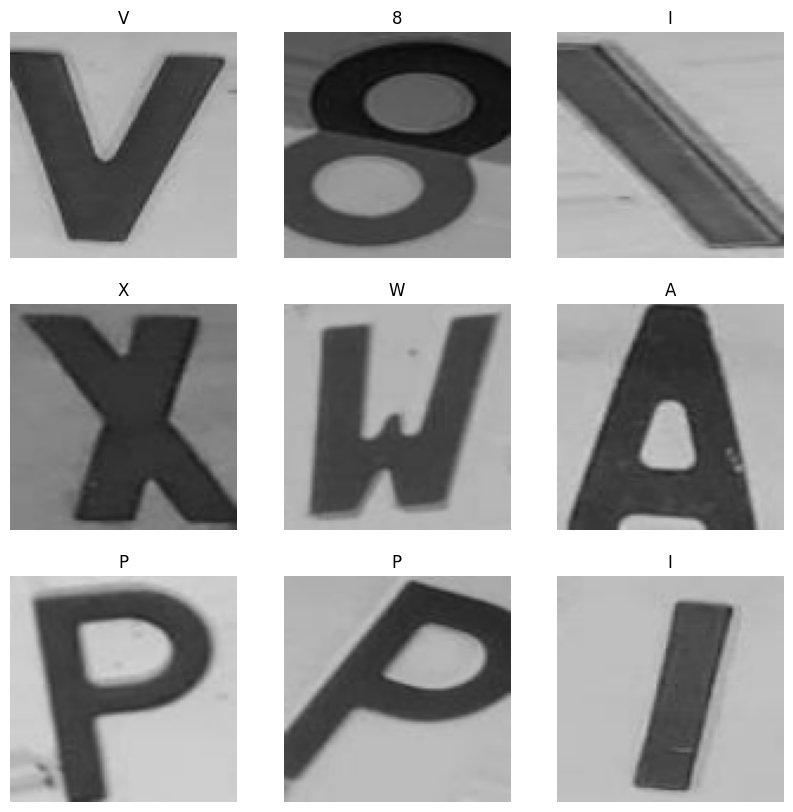

In [34]:
plt.figure(figsize=(10, 10))
for images, labels in train_loader.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [35]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_loader.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = validation_loader.cache().prefetch(buffer_size=AUTOTUNE)

Implementasi Model Sequential

In [36]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMG_HEIGHT, 
                                                              IMG_WIDTH,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Implementasi Conv2D Maxpooling Layer

In [37]:
model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
  
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(class_names))
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 96, 96, 3)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 96, 96, 3)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 48, 48, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                 

Implementasi Callback

In [39]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999 and logs.get('val_accuracy')>0.999):
      print("\nAkurasi pada training set dan validation set telah mencapai target")
      self.model.stop_training = True
callbacks = myCallback()

In [40]:
epochs = 25
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks = [callbacks]
)

Epoch 1/25
444/444 [==============================] - 305s 542ms/step - loss: 1.4130 - accuracy: 0.5816 - val_loss: 0.1434 - val_accuracy: 0.9634
Epoch 2/25
444/444 [==============================] - 206s 463ms/step - loss: 0.3218 - accuracy: 0.8976 - val_loss: 0.0802 - val_accuracy: 0.9763
Epoch 3/25
444/444 [==============================] - 191s 430ms/step - loss: 0.2022 - accuracy: 0.9367 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 4/25
444/444 [==============================] - 176s 396ms/step - loss: 0.1510 - accuracy: 0.9514 - val_loss: 0.0411 - val_accuracy: 0.9882
Epoch 5/25
444/444 [==============================] - 176s 396ms/step - loss: 0.1185 - accuracy: 0.9607 - val_loss: 0.0193 - val_accuracy: 0.9934
Epoch 6/25
444/444 [==============================] - 172s 386ms/step - loss: 0.1049 - accuracy: 0.9657 - val_loss: 0.0220 - val_accuracy: 0.9935
Epoch 7/25
444/444 [==============================] - 172s 387ms/step - loss: 0.0931 - accuracy: 0.9698 - val_loss: 0.0166 -

In [41]:
model.save('seg-cnn-new-25.h5')

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

 Plot Akurasi Model

Text(0.5, 1.0, 'Training and Validation Accuracy')

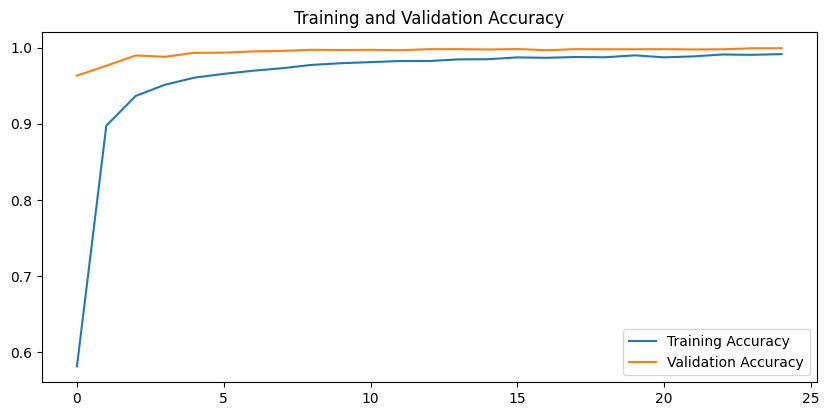

In [43]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Plot Loss Model

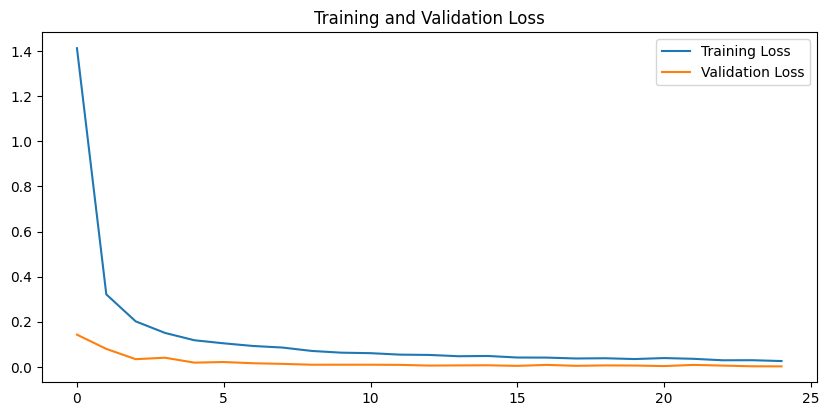

In [44]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Menyimpan Model Ke Dalam Format TF-Lite

In [54]:
with tf.io.gfile.GFile('model_cifar.tflite', 'wb') as f:
  f.write(tflite_model)